In [37]:
import matplotlib.pyplot as plt

from utils import *

data_dir_integral_norm = "./data/nml_orca_vs_gaussian/IntegralNorm"

### 1.  Comparing Gaussian and Orca Calculated Spectra

#### 1.1 Comparison using Highest Peak Norm

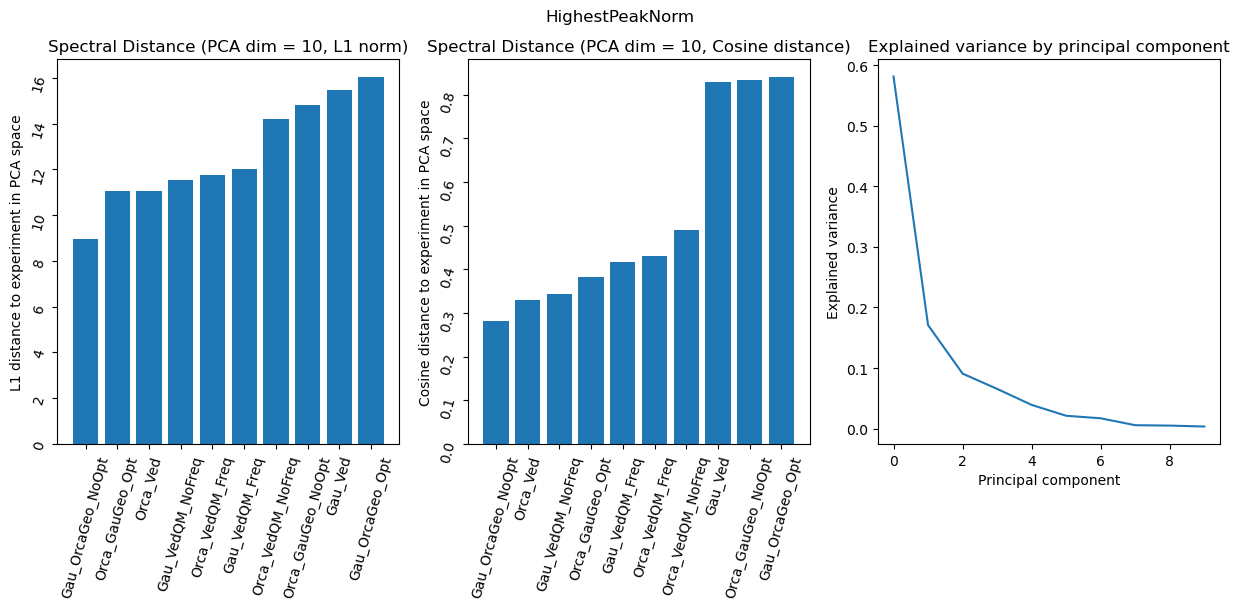

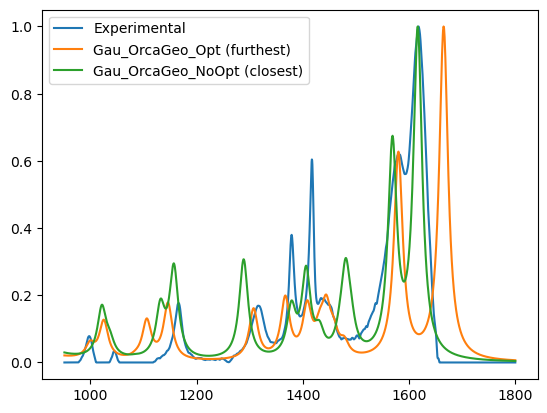

In [38]:
data_dir_highest_peak_norm = "./data/nml_orca_vs_gaussian/HighestPeakNorm"

# Read in all the highest peak form datafiles (inc exp reference)
raw_experimental_spectrum_HPN, raw_computational_spectra_HPN = get_experimental_and_computational_spectra(data_dir_highest_peak_norm)
exp_HPN_standardised, comp_HPN_standardised = standardise_spectra_with_reference(raw_computational_spectra_HPN, raw_experimental_spectrum_HPN, standardisation_method="highest_peak")

all_spectra = [exp_HPN_standardised] + list(comp_HPN_standardised.values())
PCA_distances_L1_norm, explained_variance = PCA_analysis(all_spectra, comp_HPN_standardised, exp_HPN_standardised, d=10, p=1)
PCA_distances_cosine_norm, _ = PCA_analysis(all_spectra, comp_HPN_standardised, exp_HPN_standardised, d=10, p=2, cosine_dist=True)

# make a two column subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(PCA_distances_L1_norm.keys(), PCA_distances_L1_norm.values()) 
axs[0].tick_params(labelrotation=75)
axs[0].set_ylabel("L1 distance to experiment in PCA space")
axs[0].set_title("Spectral Distance (PCA dim = 10, L1 norm)")
axs[1].bar(PCA_distances_cosine_norm.keys(), PCA_distances_cosine_norm.values())
axs[1].tick_params(labelrotation=75)
axs[1].set_ylabel("Cosine distance to experiment in PCA space")
axs[1].set_title("Spectral Distance (PCA dim = 10, Cosine distance)")
axs[2].plot(explained_variance)
axs[2].set_xlabel("Principal component")
axs[2].set_ylabel("Explained variance")
axs[2].set_title("Explained variance by principal component")
fig.suptitle("HighestPeakNorm")
plt.show()

# Identify the spectrum with the highest L1 distance
max_PCA_distance_spectrum_name = max(PCA_distances_L1_norm, key=PCA_distances_L1_norm.get)
max_PCA_distance_spectrum = comp_HPN_standardised[max_PCA_distance_spectrum_name]
# Identify the spectrum with the lowest L1 distance
min_PCA_distance_spectrum_name = min(PCA_distances_L1_norm, key=PCA_distances_L1_norm.get)
min_PCA_distance_spectrum = comp_HPN_standardised[min_PCA_distance_spectrum_name]

# Plot the experimental and the spectrum with the highest L1 distance
fig, ax = plt.subplots()
ax.plot(exp_HPN_standardised[:, 0], exp_HPN_standardised[:, 1], label="Experimental")
ax.plot(max_PCA_distance_spectrum[:, 0], max_PCA_distance_spectrum[:, 1], label=f"{max_PCA_distance_spectrum_name} (furthest)")
ax.plot(min_PCA_distance_spectrum[:, 0], min_PCA_distance_spectrum[:, 1], label=f"{min_PCA_distance_spectrum_name} (closest)")
ax.legend()
plt.show()

**Checking robustness to the dimension of PCA space for the highest peak norm comparison**

dict_keys(['Gau_OrcaGeo_NoOpt', 'Orca_GauGeo_Opt', 'Orca_Ved', 'Gau_VedQM_NoFreq', 'Orca_VedQM_Freq', 'Gau_VedQM_Freq', 'Orca_VedQM_NoFreq', 'Orca_GauGeo_NoOpt', 'Gau_Ved', 'Gau_OrcaGeo_Opt'])


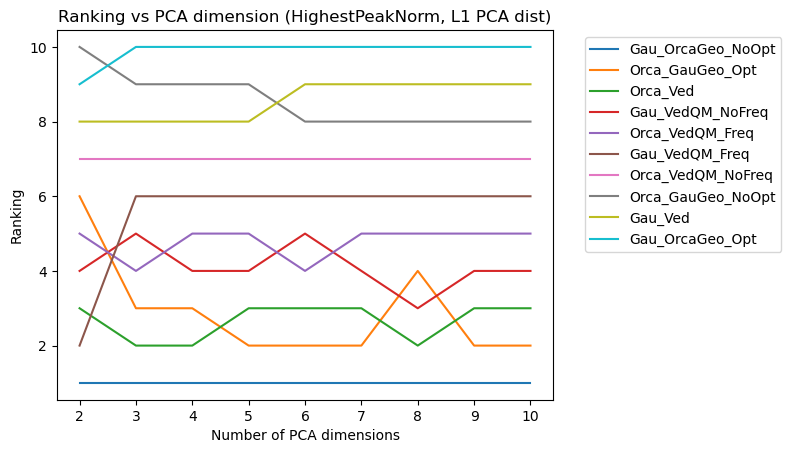

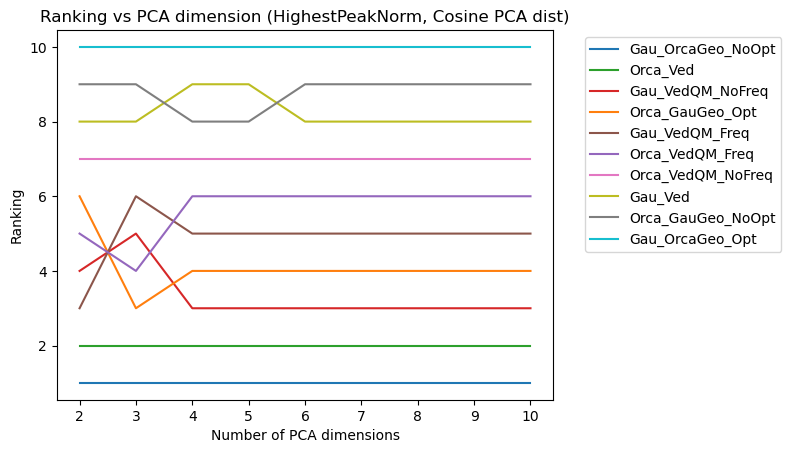

In [39]:
d_values = [2, 3, 4, 5, 6, 7, 8, 9, 10][::-1]
ranking_HPN_L1 = defaultdict(lambda: []) 
for d in d_values:
    PCA_distances, explained_variance = PCA_analysis(all_spectra, comp_HPN_standardised, exp_HPN_standardised, d=d, p=1)
    for rank, spectrum_name in enumerate(PCA_distances.keys()):
        ranking_HPN_L1[spectrum_name].append(rank + 1)

spectrum_name_to_colour = {spectrum_name: colour for spectrum_name, colour in zip(ranking_HPN_L1.keys(), plt.cm.tab10.colors)}   
print(spectrum_name_to_colour.keys())     
fig, ax = plt.subplots()
for spectrum_name, ranks in ranking_HPN_L1.items():
    ax.plot(d_values, ranks, label=spectrum_name, c=spectrum_name_to_colour[spectrum_name])
plt.xlabel("Number of PCA dimensions")
plt.ylabel("Ranking")
plt.title("Ranking vs PCA dimension (HighestPeakNorm, L1 PCA dist)")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

ranking_HPN_cosine = defaultdict(lambda: []) 
for d in d_values:
    PCA_distances, explained_variance = PCA_analysis(all_spectra, comp_HPN_standardised, exp_HPN_standardised, d=d, p=1, cosine_dist=True)
    for rank, spectrum_name in enumerate(PCA_distances.keys()):
        ranking_HPN_cosine[spectrum_name].append(rank + 1)
     
fig, ax = plt.subplots()
for spectrum_name, ranks in ranking_HPN_cosine.items():
    ax.plot(d_values, ranks, label=spectrum_name, c=spectrum_name_to_colour[spectrum_name])
plt.xlabel("Number of PCA dimensions")
plt.ylabel("Ranking")
plt.title("Ranking vs PCA dimension (HighestPeakNorm, Cosine PCA dist)")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

### 1.2. Comparison with Integral Norm

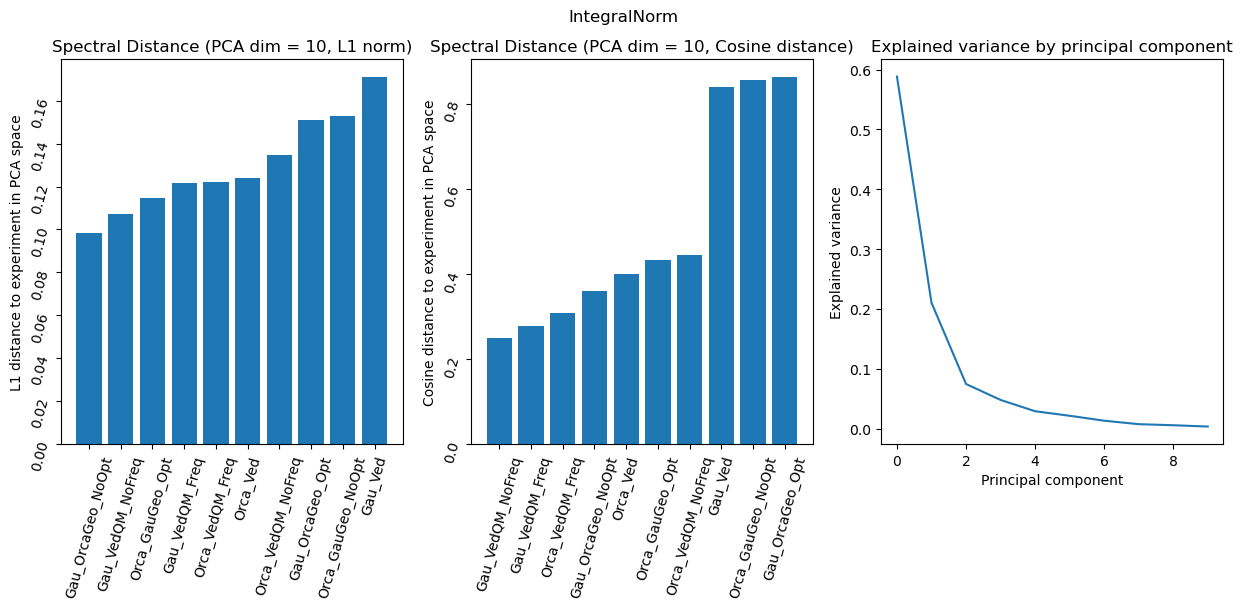

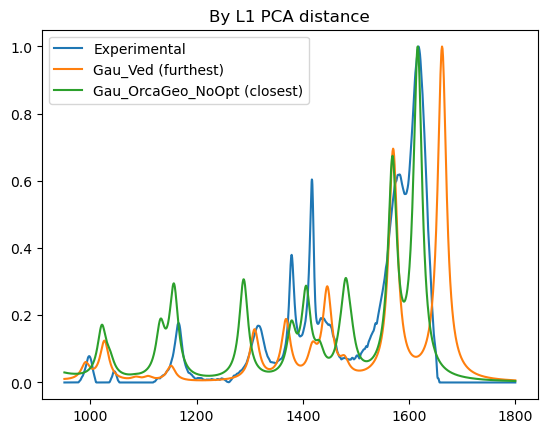

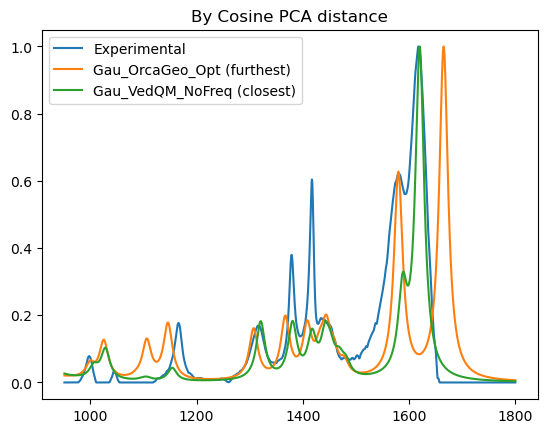

In [40]:
data_dir_integral_norm = "./data/nml_orca_vs_gaussian/IntegralNorm"

# Read in all the highest peak form datafiles (inc exp reference)
raw_experimental_spectrum_IN, raw_computational_spectra_IN = get_experimental_and_computational_spectra(data_dir_integral_norm)
exp_IN_standardised, comp_IN_standardised = standardise_spectra_with_reference(raw_computational_spectra_IN, raw_experimental_spectrum_IN, standardisation_method="integral")

all_spectra = [exp_IN_standardised] + list(comp_IN_standardised.values())
PCA_distances_L1_norm, explained_variance = PCA_analysis(all_spectra, comp_IN_standardised, exp_IN_standardised, d=10, p=1)
PCA_distances_cosine_norm, _ = PCA_analysis(all_spectra, comp_IN_standardised, exp_IN_standardised, d=10, p=2, cosine_dist=True)

# make a two column subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(PCA_distances_L1_norm.keys(), PCA_distances_L1_norm.values()) 
axs[0].tick_params(labelrotation=75)
axs[0].set_ylabel("L1 distance to experiment in PCA space")
axs[0].set_title("Spectral Distance (PCA dim = 10, L1 norm)")
axs[1].bar(PCA_distances_cosine_norm.keys(), PCA_distances_cosine_norm.values())
axs[1].tick_params(labelrotation=75)
axs[1].set_ylabel("Cosine distance to experiment in PCA space")
axs[1].set_title("Spectral Distance (PCA dim = 10, Cosine distance)")
axs[2].plot(explained_variance)
axs[2].set_xlabel("Principal component")
axs[2].set_ylabel("Explained variance")
axs[2].set_title("Explained variance by principal component")
fig.suptitle("IntegralNorm")
plt.show()

# Identify the spectrum with the highest L1 distance
max_PCA_distance_spectrum_name = max(PCA_distances_L1_norm, key=PCA_distances_L1_norm.get)
max_PCA_distance_spectrum = comp_HPN_standardised[max_PCA_distance_spectrum_name]
# Identify the spectrum with the lowest L1 distance
min_PCA_distance_spectrum_name = min(PCA_distances_L1_norm, key=PCA_distances_L1_norm.get)
min_PCA_distance_spectrum = comp_HPN_standardised[min_PCA_distance_spectrum_name]

# Identify the spectrum with the highest cosine distance
max_PCA_cos_distance_spectrum_name = max(PCA_distances_cosine_norm, key=PCA_distances_cosine_norm.get)
max_PCA_cos_distance_spectrum = comp_HPN_standardised[max_PCA_cos_distance_spectrum_name]
# Identify the spectrum with the lowest L1 distance
min_PCA_cos_distance_spectrum_name = min(PCA_distances_cosine_norm, key=PCA_distances_cosine_norm.get)
min_PCA_cos_distance_spectrum = comp_HPN_standardised[min_PCA_cos_distance_spectrum_name]

# Plot the experimental and the spectrum with the highest L1 distance
fig, ax = plt.subplots()
ax.plot(exp_HPN_standardised[:, 0], exp_HPN_standardised[:, 1], label="Experimental")
ax.plot(max_PCA_distance_spectrum[:, 0], max_PCA_distance_spectrum[:, 1], label=f"{max_PCA_distance_spectrum_name} (furthest)")
ax.plot(min_PCA_distance_spectrum[:, 0], min_PCA_distance_spectrum[:, 1], label=f"{min_PCA_distance_spectrum_name} (closest)")
ax.legend()
ax.set_title("By L1 PCA distance")
plt.show()

# Plot the experimental and the spectrum with the highest cosine distance
fig, ax = plt.subplots()
ax.plot(exp_HPN_standardised[:, 0], exp_HPN_standardised[:, 1], label="Experimental")
ax.plot(max_PCA_cos_distance_spectrum[:, 0], max_PCA_cos_distance_spectrum[:, 1], label=f"{max_PCA_cos_distance_spectrum_name} (furthest)")
ax.plot(min_PCA_cos_distance_spectrum[:, 0], min_PCA_cos_distance_spectrum[:, 1], label=f"{min_PCA_cos_distance_spectrum_name} (closest)")
ax.legend()
ax.set_title("By Cosine PCA distance")
plt.show()

**Checking robustness to the dimension of PCA space for the integral norm comparison**

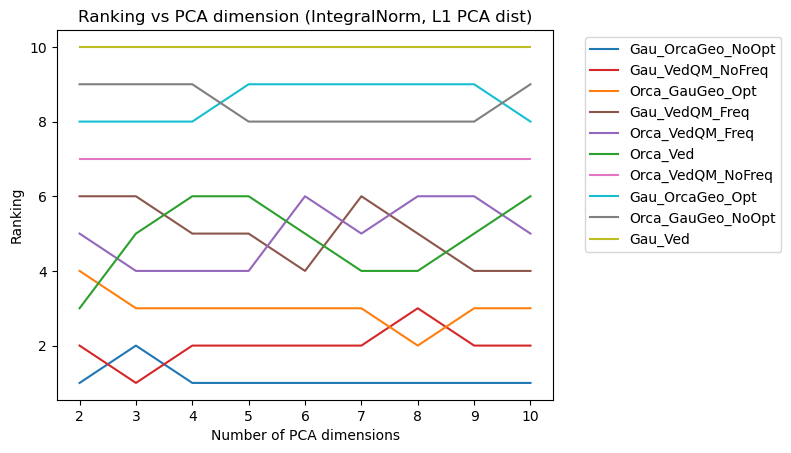

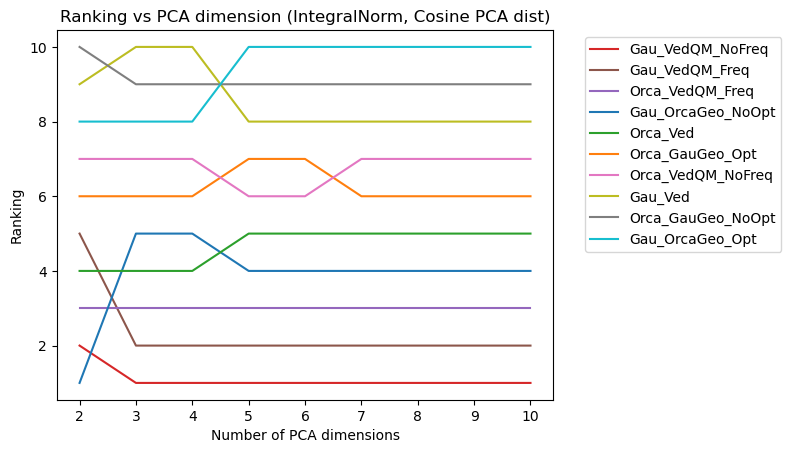

In [41]:
d_values = [2, 3, 4, 5, 6, 7, 8, 9, 10][::-1]
ranking_IN_L1 = defaultdict(lambda: []) 
for d in d_values:
    PCA_distances, explained_variance = PCA_analysis(all_spectra, comp_IN_standardised, exp_IN_standardised, d=d, p=1)
    for rank, spectrum_name in enumerate(PCA_distances.keys()):
        ranking_IN_L1[spectrum_name].append(rank + 1)
     
fig, ax = plt.subplots()
for spectrum_name, ranks in ranking_IN_L1.items():
    ax.plot(d_values, ranks, label=spectrum_name, c=spectrum_name_to_colour[spectrum_name])
plt.xlabel("Number of PCA dimensions")
plt.ylabel("Ranking")
plt.title("Ranking vs PCA dimension (IntegralNorm, L1 PCA dist)")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

ranking_IN_cosine = defaultdict(lambda: []) 
for d in d_values:
    PCA_distances, explained_variance = PCA_analysis(all_spectra, comp_IN_standardised, exp_IN_standardised, d=d, p=1, cosine_dist=True)
    for rank, spectrum_name in enumerate(PCA_distances.keys()):
        ranking_IN_cosine[spectrum_name].append(rank + 1)
     
fig, ax = plt.subplots()
for spectrum_name, ranks in ranking_IN_cosine.items():
    ax.plot(d_values, ranks, label=spectrum_name, c=spectrum_name_to_colour[spectrum_name])
plt.xlabel("Number of PCA dimensions")
plt.ylabel("Ranking")
plt.title("Ranking vs PCA dimension (IntegralNorm, Cosine PCA dist)")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

**Averages over the two alternative choice of spectra normalisations (HighestPeakNorm and Integral norm)**

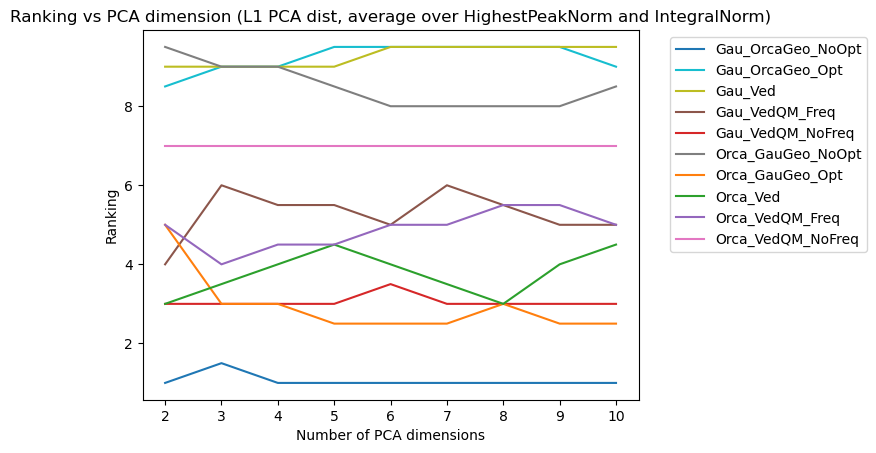

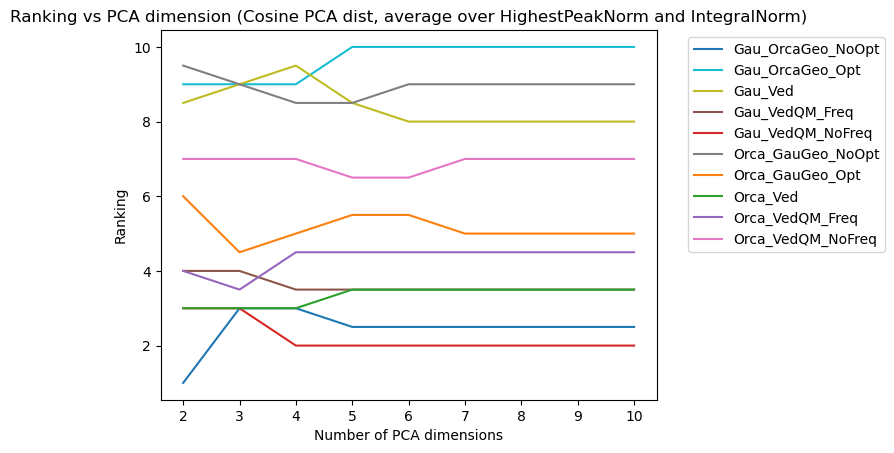

In [42]:
# Sort the dictionaries alphabetically by key
ranking_HPN_L1 = dict(sorted(ranking_HPN_L1.items()))
ranking_IN_L1 = dict(sorted(ranking_IN_L1.items()))
ranking_HPN_cosine = dict(sorted(ranking_HPN_cosine.items()))
ranking_IN_cosine = dict(sorted(ranking_IN_cosine.items()))

fig, ax = plt.subplots()
for (spectrum_name1, ranks1), (spectrum_name, ranks2) in zip(ranking_HPN_L1.items(), ranking_IN_L1.items()):
    ax.plot(d_values, (np.array(ranks1) + np.array(ranks2))/2, label=spectrum_name, c=spectrum_name_to_colour[spectrum_name])
plt.xlabel("Number of PCA dimensions")
plt.ylabel("Ranking")
plt.title("Ranking vs PCA dimension (L1 PCA dist, average over HighestPeakNorm and IntegralNorm)")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

fig, ax = plt.subplots()
for (spectrum_name, ranks1), (spectrum_name, ranks2) in zip(ranking_HPN_cosine.items(), ranking_IN_cosine.items()):
    ax.plot(d_values, (np.array(ranks1) + np.array(ranks2))/2, label=spectrum_name, c=spectrum_name_to_colour[spectrum_name])
plt.xlabel("Number of PCA dimensions")
plt.ylabel("Ranking")
plt.title("Ranking vs PCA dimension (Cosine PCA dist, average over HighestPeakNorm and IntegralNorm)")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()


Conclusions from Orca vs Gaussian comparisons:

- The distance ranking is quite robust to the dimension of the PCA space, providing d > 5.
- Cosine distance is more robust to changes in PCA dimension than L1 dist.
- Calculated spectra which are considered "most similar" to the experimental spectra seem to agree closely with the size and width of the largest peak, but not necessarily other secondary peaks.
- L1 distance seemed to prefer the spectrum who's first and second amplitude peaks were most similar to the experimental spectrum.
- Cosine distance seemed to prefer the spectrum that overall had a better shape fit, even if it was less accurate for several of the peak amplitudes.
- Seems to be that for this dataset, the cosine distance results in a more satisfactory measure of similarity than L1 distance. 
- The choice of spectrum normalisation (HighestPeakNorm or IntegralNorm) does have an impact on the results.
- Overall, HighestPeakNorm seems to lead to distance metrics that focus more on peak amplitudes and integral norm seems to lead to distance metrics that focus more on the shape of the spectrum.

### 2. Small molecule analysis

In [43]:
def get_experimental_and_computational_spectra2(data_dir, solvent, delimiter=" ", molecules_to_ignore = None):
    """
    Get experimental and computational spectra from a directory.
    """
    molecules = set()
    for filename in os.listdir(data_dir):
        molecule_name = filename.split("_")[0]
        molecules.add(molecule_name)

    spectrum_dict = {}
    for filename in os.listdir(data_dir):
        if molecules_to_ignore is not None:
            if filename.split("_")[0] in molecules_to_ignore:
                print(f"Ignoring {filename}")
                continue
        if filename.endswith("_gesamtfit.tab"):
            molecule_name = filename.split("_")[0]
            spectrum = np.loadtxt(os.path.join(data_dir, filename), delimiter=delimiter)
            spectrum_dict[molecule_name+" "+solvent+" "+"computation"] = spectrum
        elif filename.endswith("_scaled.dpt"):
            molecule_name = filename.split("_")[0]
            spectrum = np.loadtxt(os.path.join(data_dir, filename), delimiter=delimiter)
            spectrum_dict[molecule_name+" "+solvent+" "+"experiment"] = spectrum
        else:
            print(f"Unexpected file: {filename}")

    for molecule_name in molecules:
        if molecule_name+" "+solvent+" "+"experiment" not in spectrum_dict or molecule_name+" "+solvent+" "+"computation" not in spectrum_dict:
            if molecules_to_ignore is None or molecule_name not in molecules_to_ignore:
                raise ValueError(f"Missing data for molecule {molecule_name}")

    return spectrum_dict

#### 2.1 Small molecules: 1800cm-1 to 900cm-1 band

Unexpected file: 4-Guanodinebutyricacid_H2O.dpt
dict_keys(['Propionamid H2O experiment', 'Essigsaeure H2O computation', 'Propionsaeure H2O experiment', 'D2O H2O computation', 'Propionsaeure H2O computation', 'Methanol H2O computation', 'Ethanol H2O experiment', 'Propylamin H2O computation', 'GTP H2O computation', 'GDP H2O experiment', 'N-Methylacetamid15N H2O computation', '4-Guanodinebutyricacid H2O experiment', '3-N-Morpholino-propansulfonsaeure H2O computation', '3-Methylindol H2O experiment', 'Essigsaeure H2O experiment', '2-Propanol H2O experiment', '2-Propanol H2O computation', '3-Methylindol H2O computation', 'N-Methylacetamid H2O computation', '3- H2O experiment', 'GTP H2O experiment', 'N-Methylacetamid15N H2O experiment', 'D2O H2O experiment', '3- H2O computation', '3-N-Morpholino-propansulfonsaeure H2O experiment', 'Methanol H2O experiment', 'Ethanol H2O computation', 'GDP H2O computation', 'Propionamid H2O computation', 'Cresol H2O experiment', 'Butylamin H2O experiment', 'B

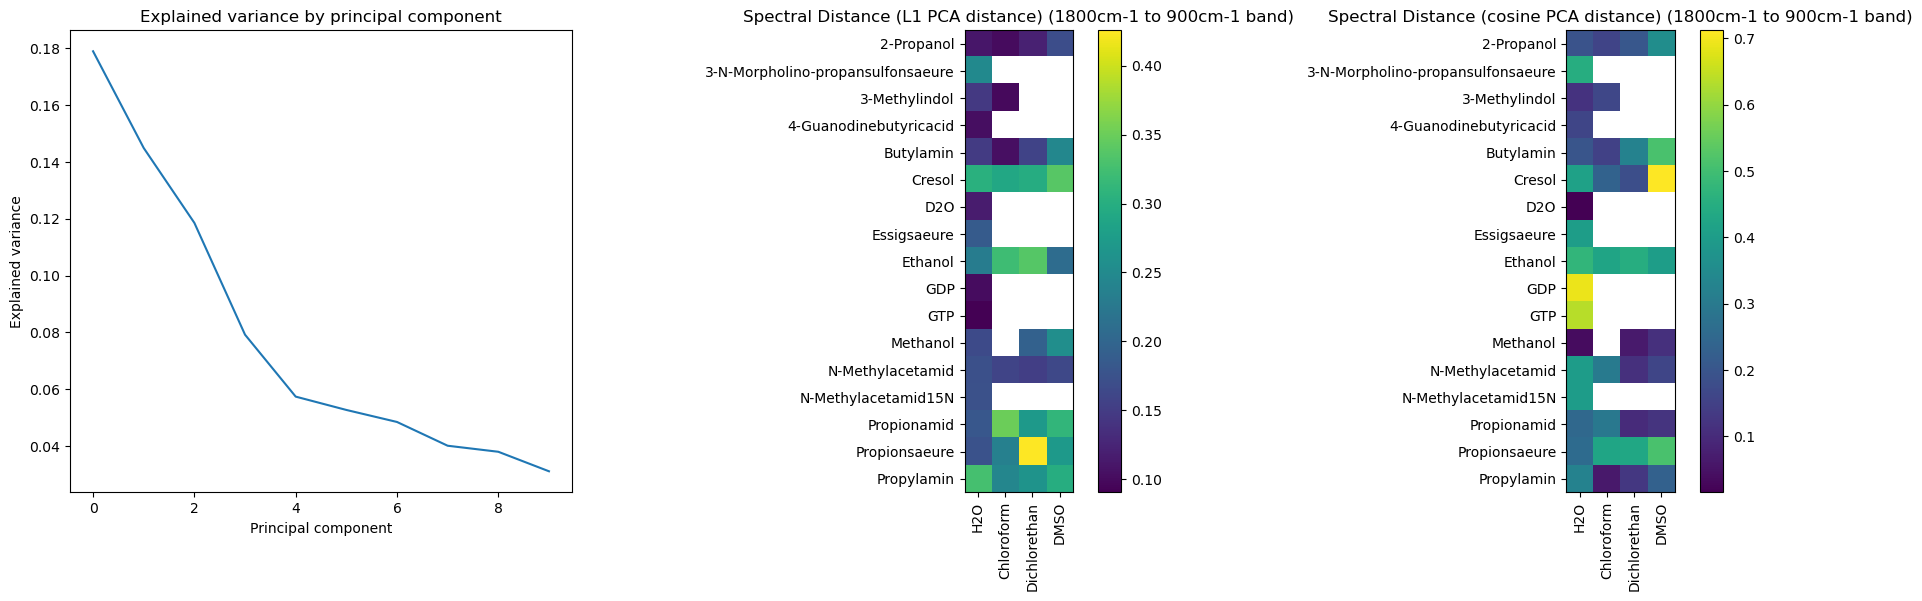

In [44]:
# For one small molecule, plot each of the spectra files and get a feel for what should be compared with what
molecules = ["2-Propanol", "3-N-Morpholino-propansulfonsaeure", "3-Methylindol", "4-Guanodinebutyricacid", "Butylamin", "Cresol", "D2O", "Essigsaeure", "Ethanol", "GDP", "GTP", "Methanol", "N-Methylacetamid", "N-Methylacetamid15N", "Propionamid", "Propionsaeure", "Propylamin"]
solvents = ["H2O", "Chloroform", "Dichlorethan", "DMSO"]
spectrum_type = ["experiment", "computation"]
all_spectra_dict = {}
for solvent in solvents:
    data_dir = os.path.join("./data/small_molecules_solvent", solvent)
    spectra_dict = get_experimental_and_computational_spectra2(data_dir, solvent)
    all_spectra_dict.update(spectra_dict)

all_spectra_standardised = standardise_spectra(all_spectra_dict, standardisation_method="integral")

print(all_spectra_standardised.keys())

pca, explained_variance = fit_PCA_distances(all_spectra_standardised.values(), d=10)

fib, ax = plt.subplots(1, 3, figsize=(22, 6))

ax[0].plot(explained_variance)
ax[0].set_xlabel("Principal component")
ax[0].set_ylabel("Explained variance")
ax[0].set_title("Explained variance by principal component")

L1_distance_matrix = np.full((len(molecules), len(solvents)), np.nan)
for i, molecule in enumerate(molecules):
    for j, solvent in enumerate(solvents):
        try:
            L1_distance_matrix[i, j] = compute_PCA_distance(all_spectra_standardised[molecule+" "+solvent+" experiment"], all_spectra_standardised[molecule+" "+solvent+" computation"], pca, p=1)
        except:
            pass

img = ax[1].imshow(L1_distance_matrix)
plt.colorbar(img, ax=ax[1])
ax[1].set_xticks(ticks=range(len(solvents)), labels=solvents, rotation=90)
ax[1].set_yticks(ticks=range(len(molecules)), labels=molecules)
ax[1].set_title("Spectral Distance (L1 PCA distance) (1800cm-1 to 900cm-1 band)")

cosine_distance_matrix = np.full((len(molecules), len(solvents)), np.nan)
for i, molecule in enumerate(molecules):
    for j, solvent in enumerate(solvents):
        try:
            cosine_distance_matrix[i, j] = compute_PCA_distance(all_spectra_standardised[molecule+" "+solvent+" experiment"], all_spectra_standardised[molecule+" "+solvent+" computation"], pca, p=1, cosine_dist=True)
        except:
            pass

img = ax[2].imshow(cosine_distance_matrix)
plt.colorbar(img, ax=ax[2])
ax[2].set_xticks(ticks=range(len(solvents)), labels=solvents, rotation=90)
ax[2].set_yticks(ticks=range(len(molecules)), labels=molecules)
ax[2].set_title("Spectral Distance (cosine PCA distance) (1800cm-1 to 900cm-1 band)")

plt.show()

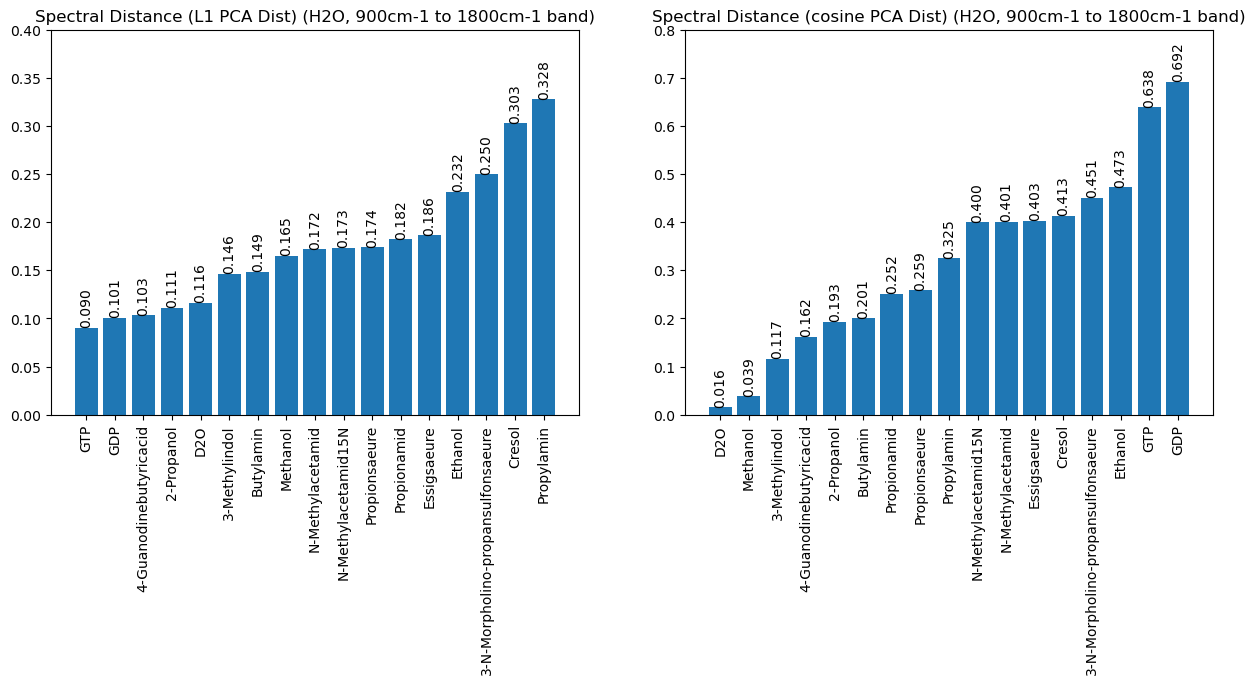

In [45]:
L1_distances = {}
for i, molecule in enumerate(molecules):
    if L1_distance_matrix[i, 0] != np.nan:
        L1_distances[molecule] = L1_distance_matrix[i, 0]

L1_distances = dict(sorted(L1_distances.items(), key=lambda item: item[1]))

cosine_distances = {}
for i, molecule in enumerate(molecules):
    if cosine_distance_matrix[i, 0] != np.nan:
        cosine_distances[molecule] = cosine_distance_matrix[i, 0]

cosine_distances = dict(sorted(cosine_distances.items(), key=lambda item: item[1]))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(L1_distances.keys(), L1_distances.values())
ax[0].set_xticks(ticks=range(len(molecules)), labels=L1_distances.keys(), rotation = 90)
ax[0].set_title("Spectral Distance (L1 PCA Dist) (H2O, 900cm-1 to 1800cm-1 band)")
# annotate the distances on the bar chart
for molecule, distance in L1_distances.items():
    ax[0].text(molecule, distance, f"{distance:.3f}", ha='center', va='bottom', rotation=90)
ax[0].set_ylim(0, 0.4)

ax[1].bar(cosine_distances.keys(), cosine_distances.values())
ax[1].set_xticks(ticks=range(len(molecules)), labels=cosine_distances.keys(), rotation = 90)
ax[1].set_title("Spectral Distance (cosine PCA Dist) (H2O, 900cm-1 to 1800cm-1 band)")
# annotate the distances on the bar chart
for molecule, distance in cosine_distances.items():
    ax[1].text(molecule, distance, f"{distance:.3f}", ha='center', va='bottom', rotation=90)
ax[1].set_ylim(0, 0.8)


plt.show()

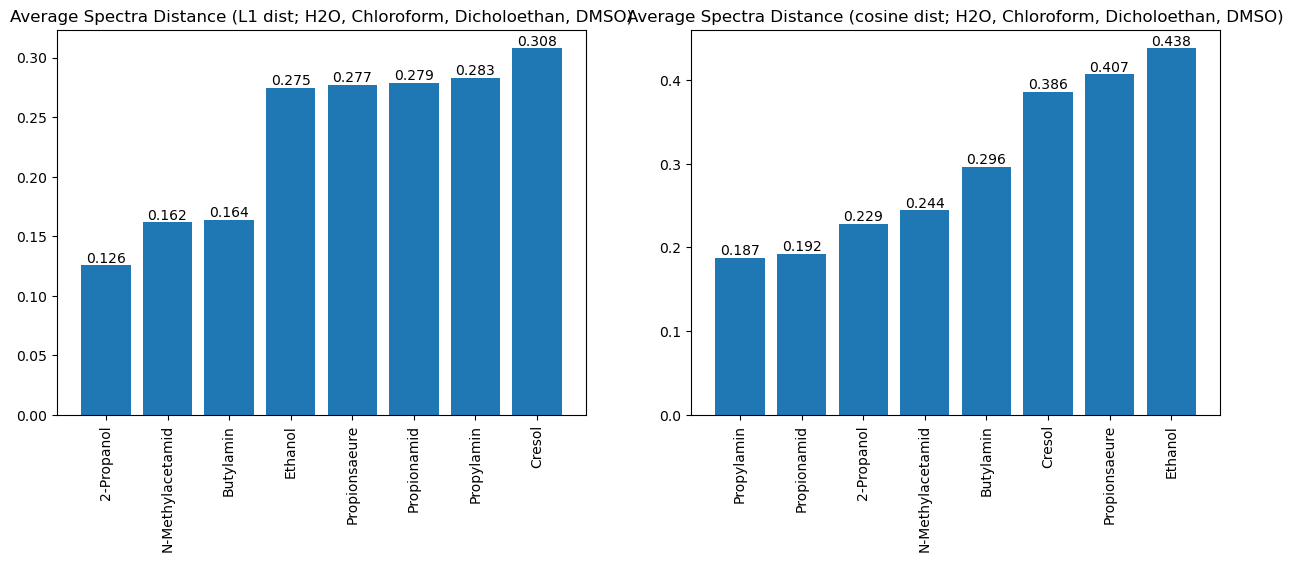

In [46]:
# Find molecules with at least four solevent
L1_average_distances = {}
for i, molecule in enumerate(molecules):
    if np.sum(~np.isnan(L1_distance_matrix[i, :])) >= 4:
        mean_distance = np.mean(L1_distance_matrix[i, ~np.isnan(L1_distance_matrix[i, :])])
        L1_average_distances[molecule] = mean_distance

L1_average_distances = dict(sorted(L1_average_distances.items(), key=lambda item: item[1]))

cosine_average_distances = {}
for i, molecule in enumerate(molecules):
    if np.sum(~np.isnan(cosine_distance_matrix[i, :])) >= 4:
        mean_distance = np.mean(cosine_distance_matrix[i, ~np.isnan(cosine_distance_matrix[i, :])])
        cosine_average_distances[molecule] = mean_distance

cosine_average_distances = dict(sorted(cosine_average_distances.items(), key=lambda item: item[1]))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(L1_average_distances.keys(), L1_average_distances.values())
ax[0].set_xticks(ticks=range(len(L1_average_distances)), labels=L1_average_distances.keys(), rotation = 90)
ax[0].set_title("Average Spectra Distance (L1 dist; H2O, Chloroform, Dicholoethan, DMSO)")
# annotate the distances on the bar chart
for molecule, distance in L1_average_distances.items():
    ax[0].text(molecule, distance, f"{distance:.3f}", ha='center', va='bottom')

ax[1].bar(cosine_average_distances.keys(), cosine_average_distances.values())
ax[1].set_xticks(ticks=range(len(cosine_average_distances)), labels=cosine_average_distances.keys(), rotation = 90)
ax[1].set_title("Average Spectra Distance (cosine dist; H2O, Chloroform, Dicholoethan, DMSO)")
# annotate the distances on the bar chart
for molecule, distance in cosine_average_distances.items():
    ax[1].text(molecule, distance, f"{distance:.3f}", ha='center', va='bottom')

plt.show()


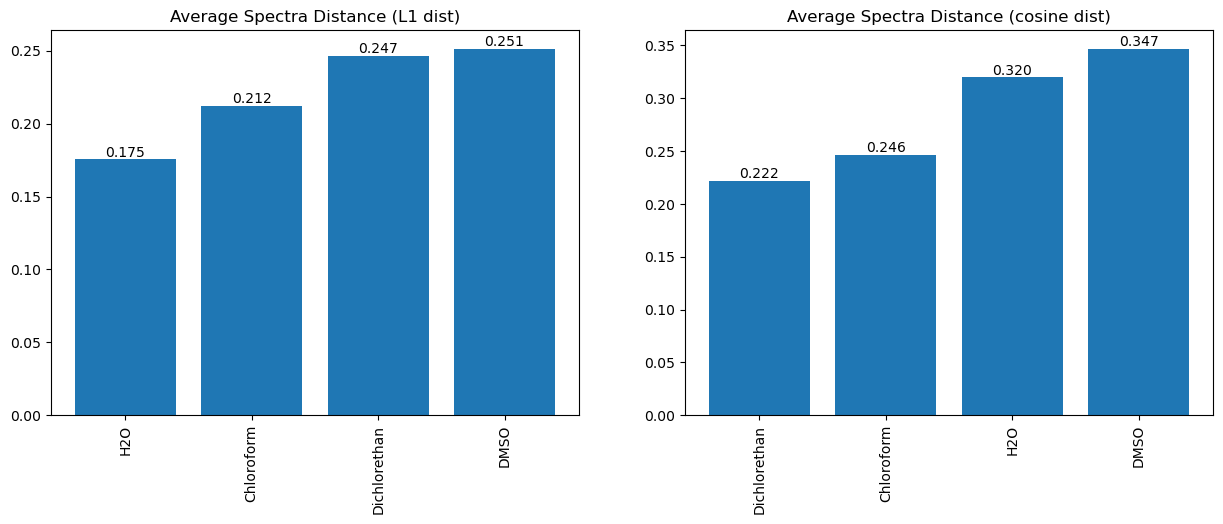

In [47]:
# Find solvents with at least 6 molecules
L1_average_distances = {}
for i, solvent in enumerate(solvents):
    if np.sum(~np.isnan(L1_distance_matrix[:, i])) >= 6:
        mean_distance = np.mean(L1_distance_matrix[~np.isnan(L1_distance_matrix[:, i]), i])
        L1_average_distances[solvent] = mean_distance

L1_average_distances = dict(sorted(L1_average_distances.items(), key=lambda item: item[1]))

cosine_average_distances = {}
for i, solvent in enumerate(solvents):
    if np.sum(~np.isnan(cosine_distance_matrix[:, i])) >= 6:
        mean_distance = np.mean(cosine_distance_matrix[~np.isnan(cosine_distance_matrix[:, i]), i])
        cosine_average_distances[solvent] = mean_distance

cosine_average_distances = dict(sorted(cosine_average_distances.items(), key=lambda item: item[1]))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(L1_average_distances.keys(), L1_average_distances.values())
ax[0].set_xticks(ticks=range(len(L1_average_distances)), labels=L1_average_distances.keys(), rotation = 90)
ax[0].set_title("Average Spectra Distance (L1 dist)")
# annotate the number on the bar chart
for i, (solvent, distance) in enumerate(L1_average_distances.items()):
    ax[0].text(i, distance, f"{distance:.3f}", ha='center', va='bottom')

ax[1].bar(cosine_average_distances.keys(), cosine_average_distances.values())
ax[1].set_xticks(ticks=range(len(cosine_average_distances)), labels=cosine_average_distances.keys(), rotation = 90)
ax[1].set_title("Average Spectra Distance (cosine dist)")
# annotate the number on the bar chart
for i, (solvent, distance) in enumerate(cosine_average_distances.items()):
    ax[1].text(i, distance, f"{distance:.3f}", ha='center', va='bottom')


plt.show()

Conclusions from small molecule analysis (1800cm-1 to 900cm-1 band):

- Significant differences between choice of L1 or cosine distance for the small molecule analysis.
- Examining the spectra, cosine distance seems to be more appropriate for this dataset.

#### 2.2 Small molecules: 2700cm-1 to 4000cm-1 band

Ignoring Propionamid_H2O_scaled.dpt
Ignoring Propionsaeure_H2O_pH3_scaled.dpt
Unexpected file: 4-Guanodinebutyricacid_H2O.dpt
Ignoring Propionsaeure_H2O_pH3_gesamtfit.tab
Ignoring Ethanol_H2O_scaled.dpt
Ignoring Ethanol_H2O_gesamtfit.tab
Ignoring Propionamid_H2O_gesamtfit.tab
Ignoring Cresol_H2O_scaled.dpt
Ignoring Butylamin_H2O_scaled.dpt
Ignoring Butylamin_H2O_gesamtfit.tab
Ignoring Cresol_H2O_gesamtfit.tab
Ignoring Propionsaeure_Chloroform_gesamtfit.tab
Ignoring Butylamin_Chloroform_scaled.dpt
Ignoring Propionsaeure_Chloroform_scaled.dpt
Ignoring Propionamid_Chloroform_scaled.dpt
Ignoring Butylamin_Chloroform_gesamtfit.tab
Ignoring Ethanol_Chloroform_gesamtfit.tab
Ignoring Ethanol_Chloroform_scaled.dpt
Ignoring Cresol_Chloroform_gesamtfit.tab
Ignoring Cresol_Chloroform_scaled.dpt
Ignoring Propionamid_Chloroform_gesamtfit.tab
Ignoring Propionamid_Dichlorethan_scaled.dpt
Ignoring Propionamid_Dichlorethan_gesamtfit.tab
Ignoring Ethanol_Dichlorethan_scaled.dpt
Ignoring Butylamin_Dichlor

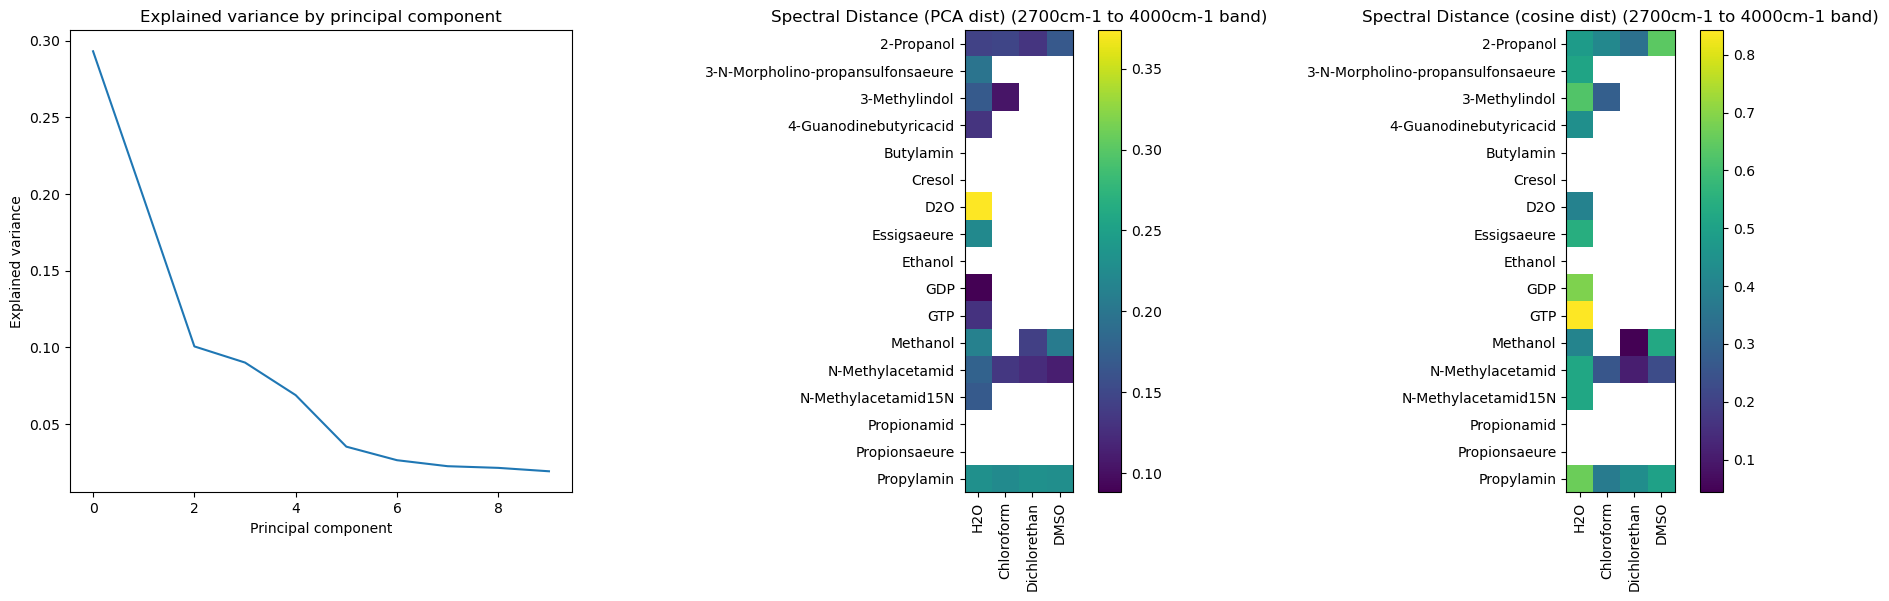

In [61]:
min_wavenumber, max_wavenumber = 2700, 4000

#standard_wavenumbers = get_standard_wavenumbers(all_spectra_dict, all_spectra_dict[arbitary_reference], min_wavenumber, max_wavenumber)

molecules_to_ignore = ["Cresol", "Ethanol", "Propionamid", "Butylamin", "Propionsaeure"] 
all_spectra_dict_high_wavenumbers = {}
for solvent in solvents:
    data_dir = os.path.join("./data/small_molecules_solvent", solvent)
    spectra_dict = get_experimental_and_computational_spectra2(data_dir, solvent, molecules_to_ignore=molecules_to_ignore)
    # check if there are any Nones in the spectra dict
    for key, value in spectra_dict.items():
        if value is None:
            print(f"Missing data for {key}")
    all_spectra_dict_high_wavenumbers.update(spectra_dict)

# check if there are any Nones in the all_spectra_dict_high_wavenumbers
for key, value in all_spectra_dict_high_wavenumbers.items():
    if value is None:
        print(f"Missing data for {key}")


all_spectra_standardised_high_wavenumbers = standardise_spectra(all_spectra_dict_high_wavenumbers, standardisation_method="integral")

pca, explained_variance = fit_PCA_distances(all_spectra_standardised_high_wavenumbers.values(), d=10)

fig, ax = plt.subplots(1, 3, figsize=(22, 6))

ax[0].plot(explained_variance)
ax[0].set_xlabel("Principal component")
ax[0].set_ylabel("Explained variance")
ax[0].set_title("Explained variance by principal component")

L1_distance_matrix = np.full((len(molecules), len(solvents)), np.nan)
for i, molecule in enumerate(molecules):
    for j, solvent in enumerate(solvents):
        try:
            L1_distance_matrix[i, j] = compute_PCA_distance(all_spectra_standardised_high_wavenumbers[molecule+" "+solvent+" experiment"], all_spectra_standardised_high_wavenumbers[molecule+" "+solvent+" computation"], pca, p=1)
        except:
            pass
            #print(f"Missing data for {molecule} {solvent}")

im = ax[1].imshow(L1_distance_matrix)
plt.colorbar(im, ax=ax[1])
ax[1].set_xticks(ticks=range(len(solvents)), labels=solvents, rotation=90)
ax[1].set_yticks(ticks=range(len(molecules)), labels=molecules)
ax[1].set_title("Spectral Distance (PCA dist) (2700cm-1 to 4000cm-1 band)")

cosine_distance_matrix = np.full((len(molecules), len(solvents)), np.nan)
for i, molecule in enumerate(molecules):
    for j, solvent in enumerate(solvents):
        try:
            cosine_distance_matrix[i, j] = compute_PCA_distance(all_spectra_standardised_high_wavenumbers[molecule+" "+solvent+" experiment"], all_spectra_standardised_high_wavenumbers[molecule+" "+solvent+" computation"], pca, p=1, cosine_dist=True)
        except:
            pass
            #print(f"Missing data for {molecule} {solvent}")
        
im = ax[2].imshow(cosine_distance_matrix)
plt.colorbar(im, ax=ax[2])
ax[2].set_xticks(ticks=range(len(solvents)), labels=solvents, rotation=90)
ax[2].set_yticks(ticks=range(len(molecules)), labels=molecules)
ax[2].set_title("Spectral Distance (cosine dist) (2700cm-1 to 4000cm-1 band)")

plt.show()

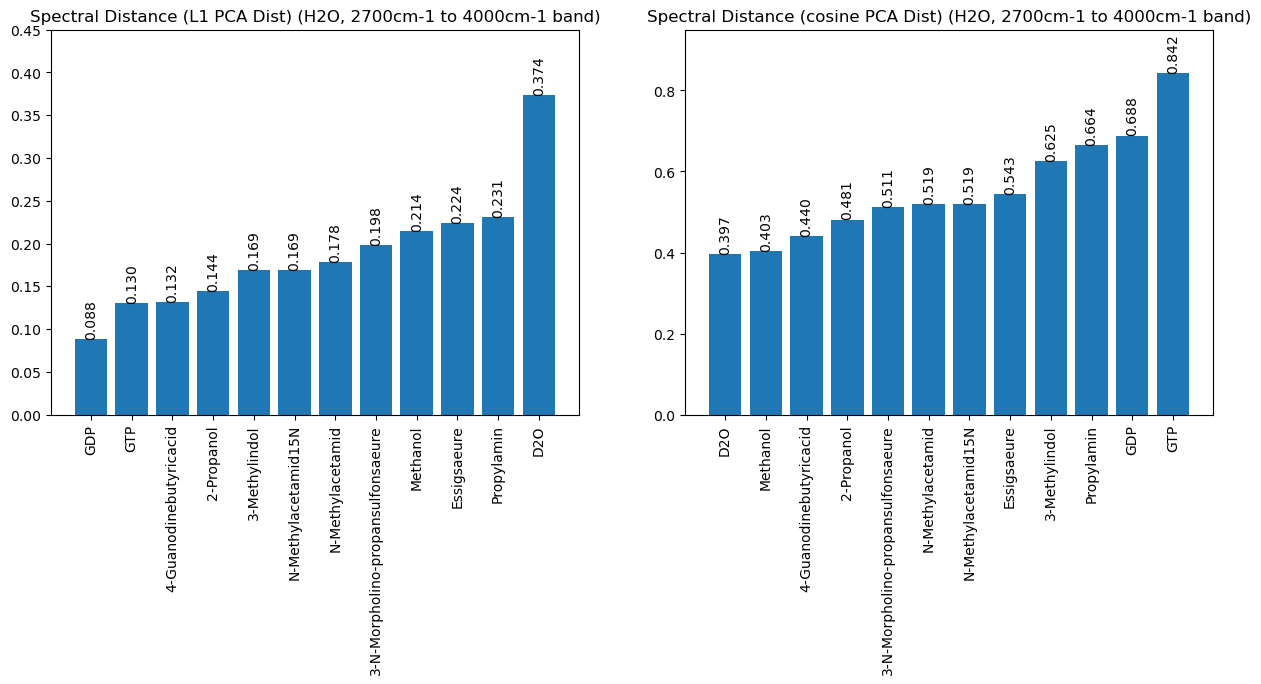

In [60]:
L1_distances = {}
for i, molecule in enumerate(molecules):
    if L1_distance_matrix[i, 0] > 0:
        L1_distances[molecule] = L1_distance_matrix[i, 0]

L1_distances = dict(sorted(L1_distances.items(), key=lambda item: item[1]))

cosine_distances = {}
for i, molecule in enumerate(molecules):
    if cosine_distance_matrix[i, 0] > 0:
        cosine_distances[molecule] = cosine_distance_matrix[i, 0]

cosine_distances = dict(sorted(cosine_distances.items(), key=lambda item: item[1]))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(L1_distances.keys(), L1_distances.values())
ax[0].set_xticks(ticks=range(len(L1_distances.keys())), labels=L1_distances.keys(), rotation = 90)
ax[0].set_title("Spectral Distance (L1 PCA Dist) (H2O, 2700cm-1 to 4000cm-1 band)")
# annotate the distances on the bar chart
for molecule, distance in L1_distances.items():
    ax[0].text(molecule, distance, f"{distance:.3f}", ha='center', va='bottom', rotation=90)
ax[0].set_ylim(0, 0.45)

ax[1].bar(cosine_distances.keys(), cosine_distances.values())
ax[1].set_xticks(ticks=range(len(cosine_distances.keys())), labels=cosine_distances.keys(), rotation = 90)
ax[1].set_title("Spectral Distance (cosine PCA Dist) (H2O, 2700cm-1 to 4000cm-1 band)")
# annotate the distances on the bar chart
for molecule, distance in cosine_distances.items():
    ax[1].text(molecule, distance, f"{distance:.3f}", ha='center', va='bottom', rotation=90)
ax[1].set_ylim(0, 0.95)


plt.show()

Conclusions from small molecule analysis (2700cm-1 to 4000cm-1 band):

- Significant differences between choice of L1 or cosine distance for the small molecule analysis. 
- D2O considered most similar based on spectral cosine distance, but least similar based on L1 distance. The cosine distance interpretation makes more sense based on a visual examination of the spectra.